# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Based on the documentation, the data represents the results of multiple marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### <font color="blue">The business objective is to predict whether a client will subscribe to a term deposit based on the provided marketing campaign data.

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y      

In [ ]:
# Show the unique values of categorial features
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values for column '{column}':")
        print(df[column].unique())
        print("-" * 30)

Unique values for column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced' 'unknown']
------------------------------
Unique values for column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------
Unique values for column 'default':
['no' 'unknown' 'yes']
------------------------------
Unique values for column 'housing':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'loan':
['no' 'yes' 'unknown']
------------------------------
Unique values for column 'contact':
['telephone' 'cellular']
------------------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------------------------------
Unique v

In [ ]:
# Lets plot the histogram of each feature versus Y.
# Lets separate the features into numerical and categorical types.
# Identify numerical and categorical columns from the dataframe, excluding the target variable 'y'.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'y' in numerical_cols:
    numerical_cols.remove('y')
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


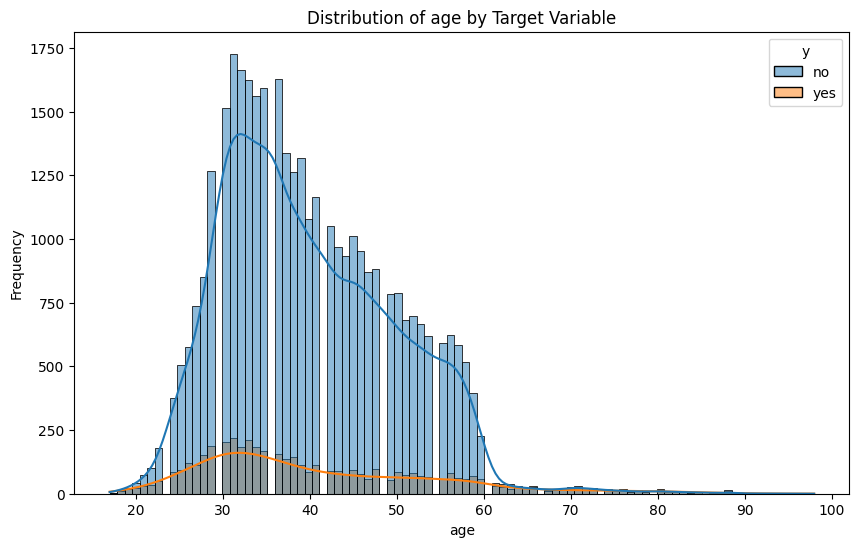

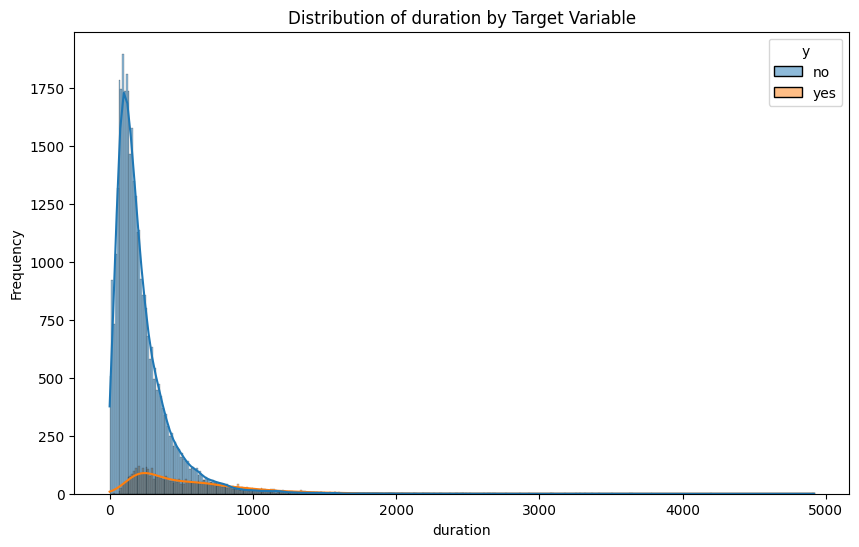

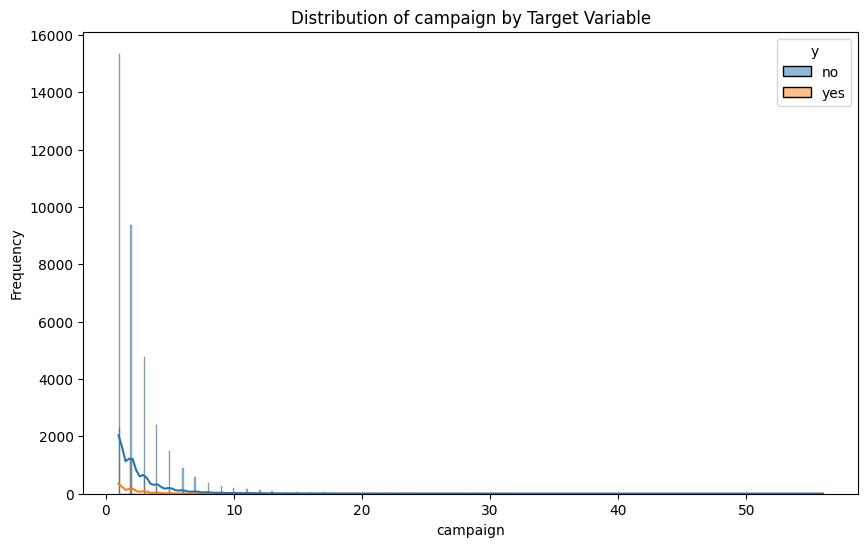

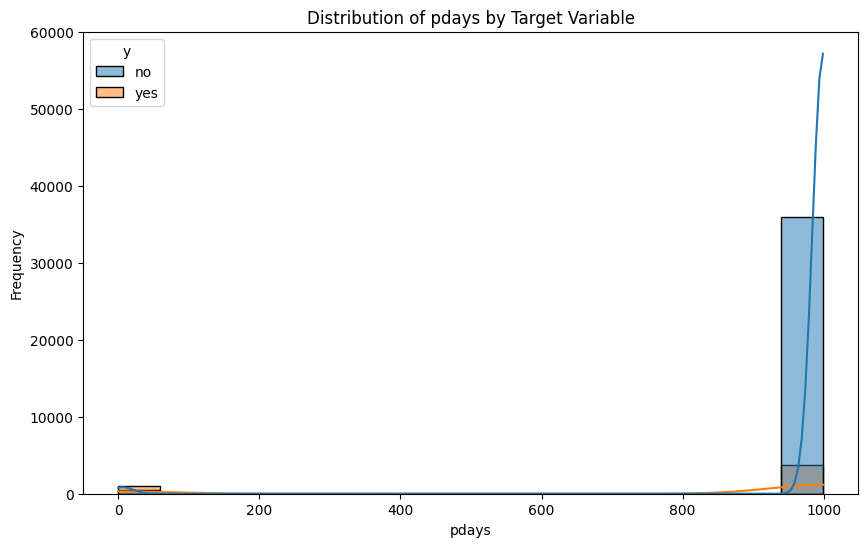

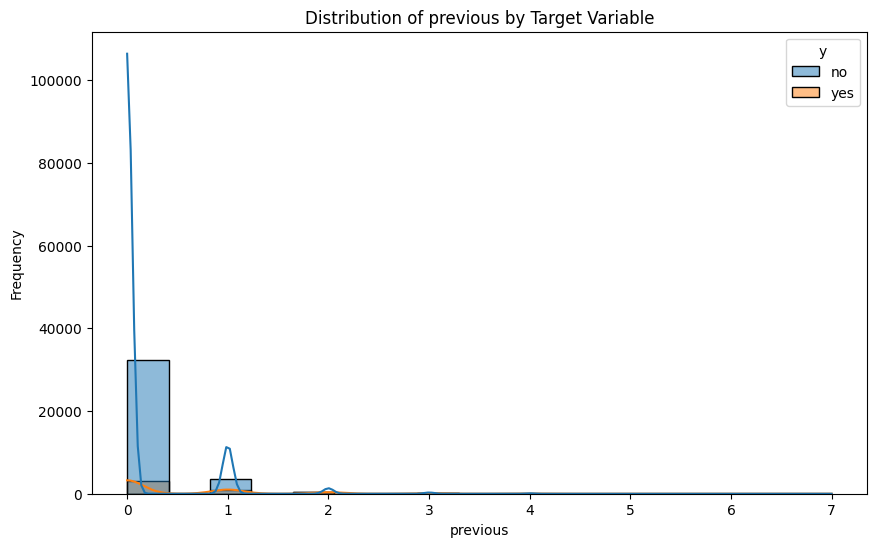

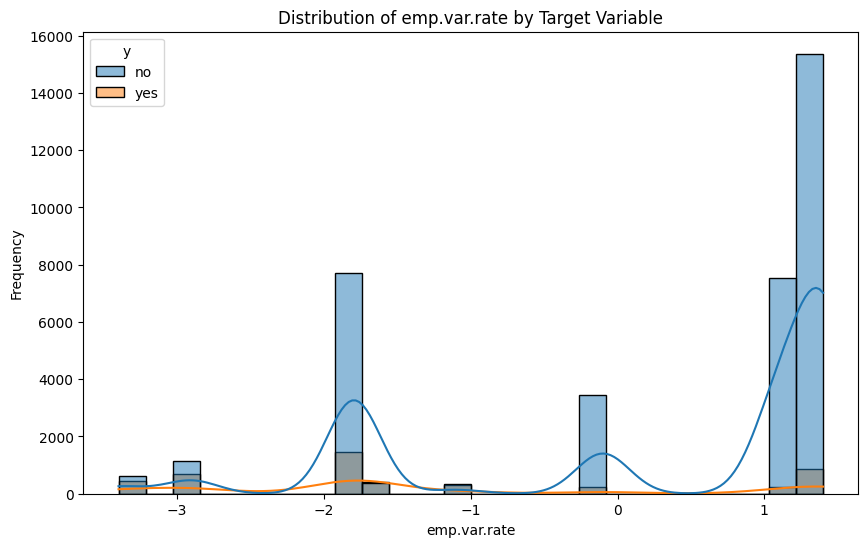

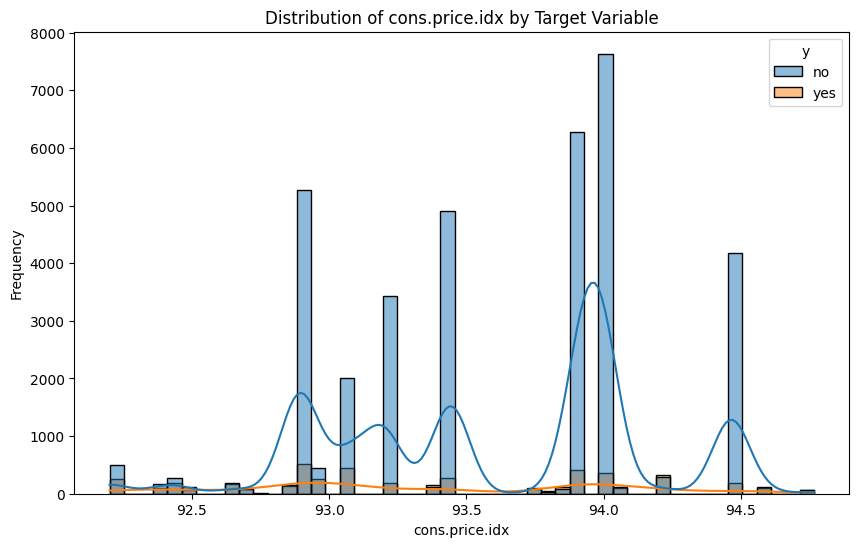

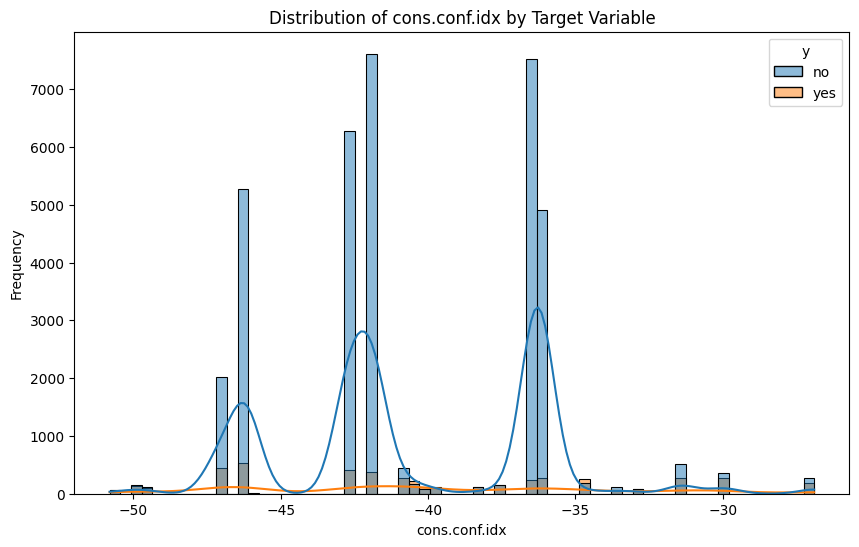

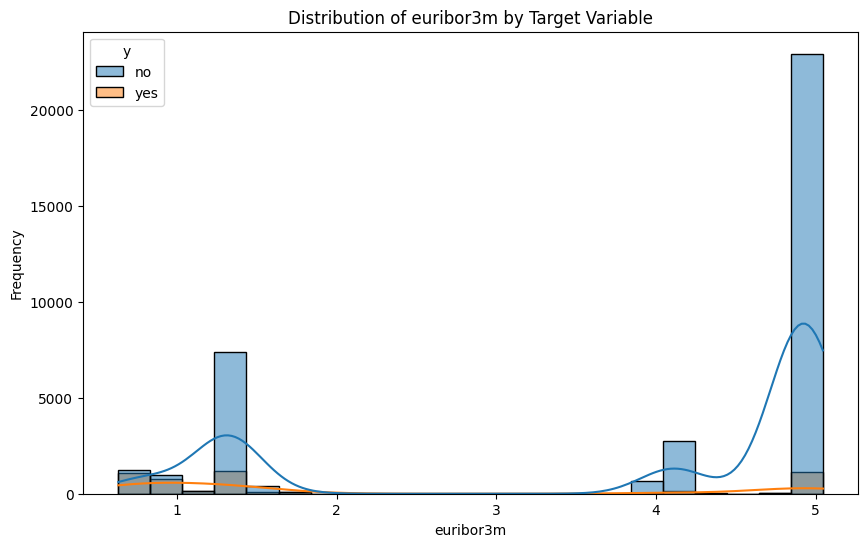

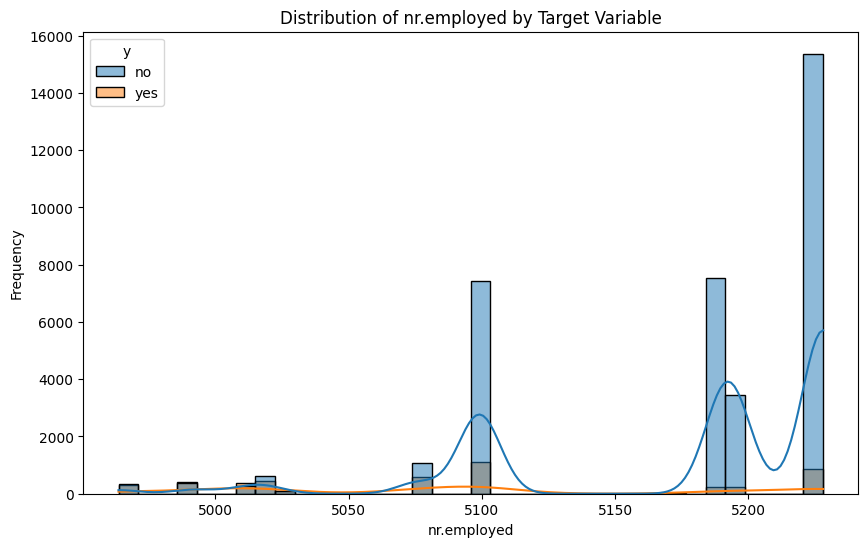

In [ ]:
# Visualize numerical features
# Create histograms for each numerical feature, colored by the target variable 'y'.
# Iterate through numerical columns and plot histograms colored by the target variable 'y'.
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='y', kde=True)
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

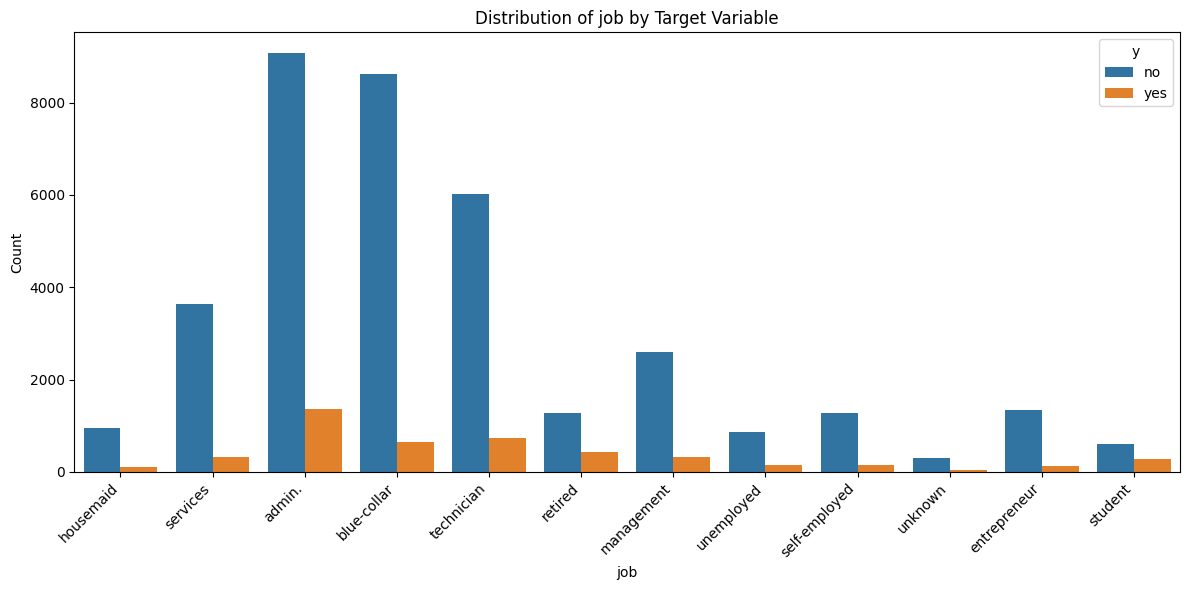

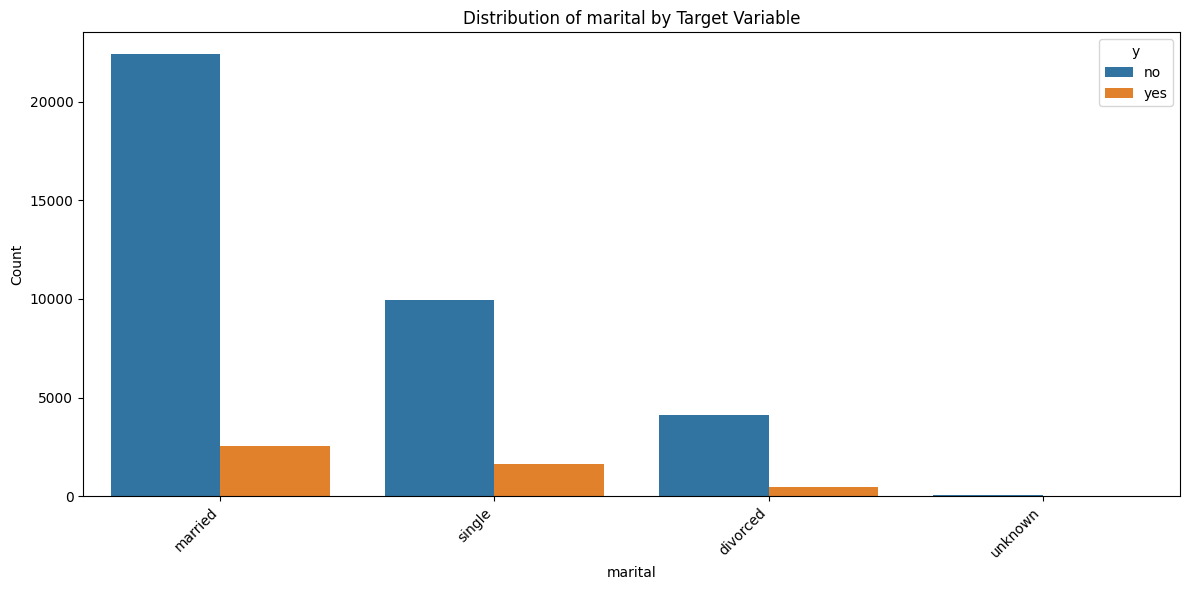

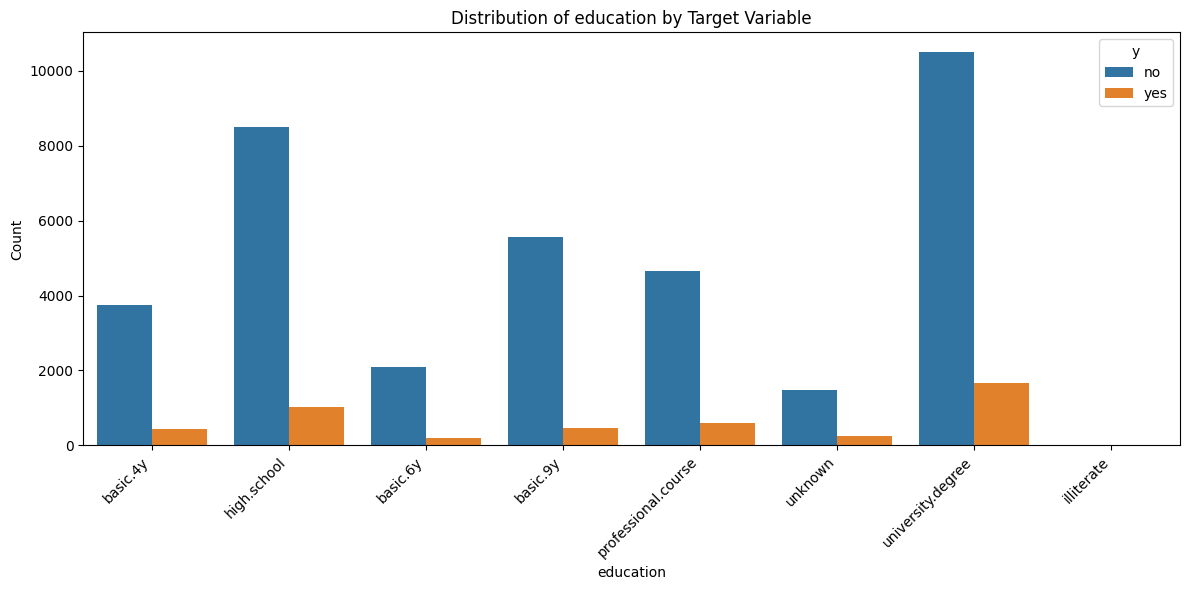

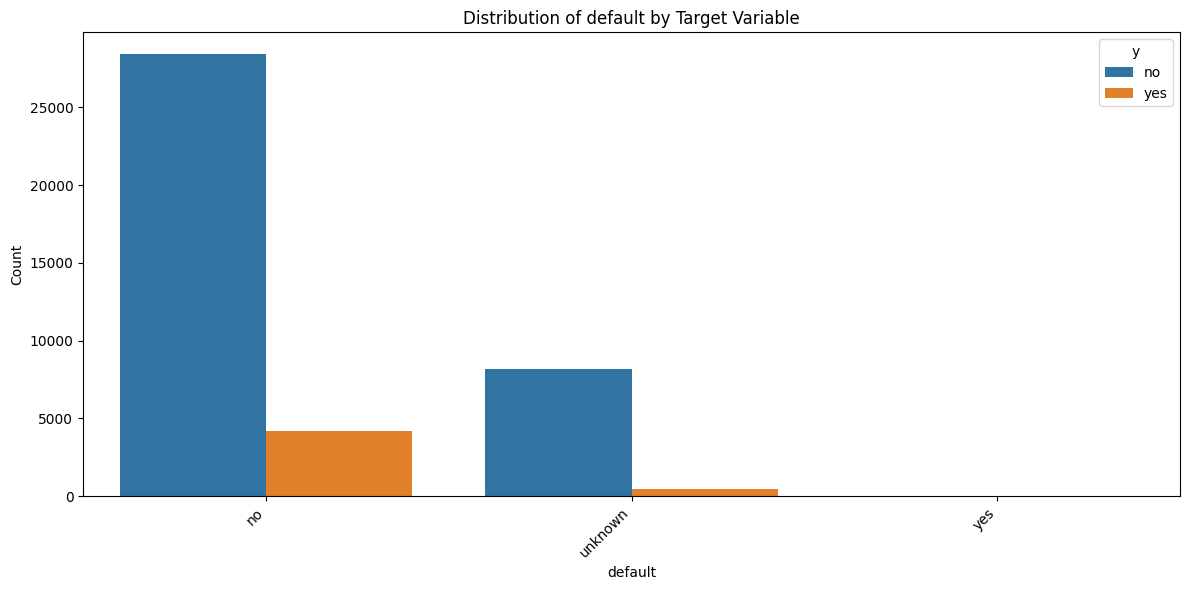

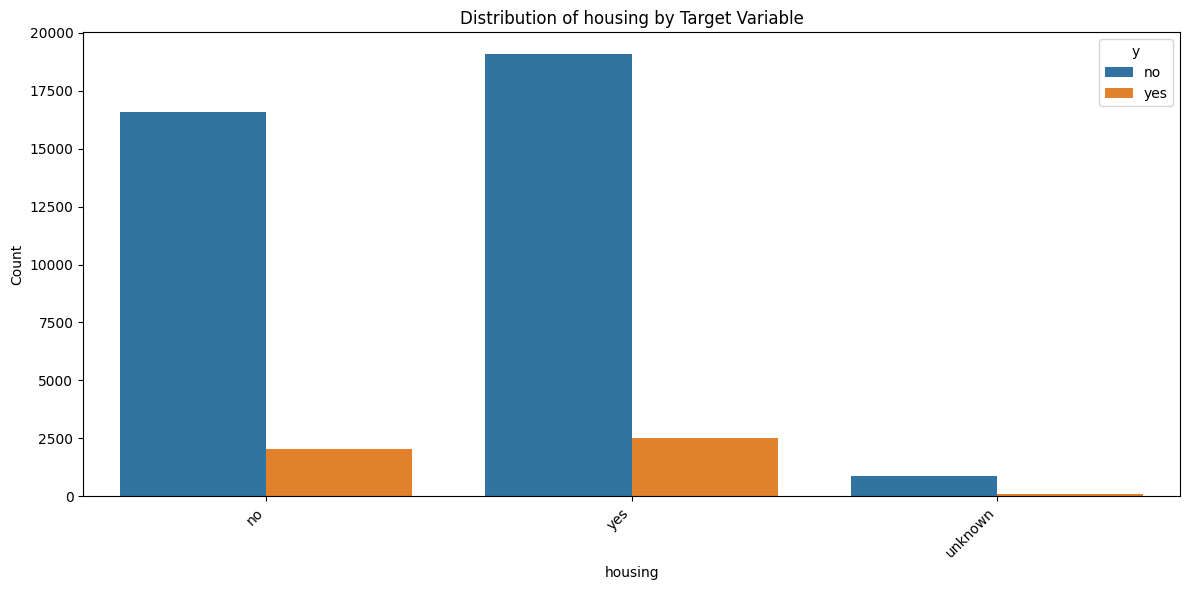

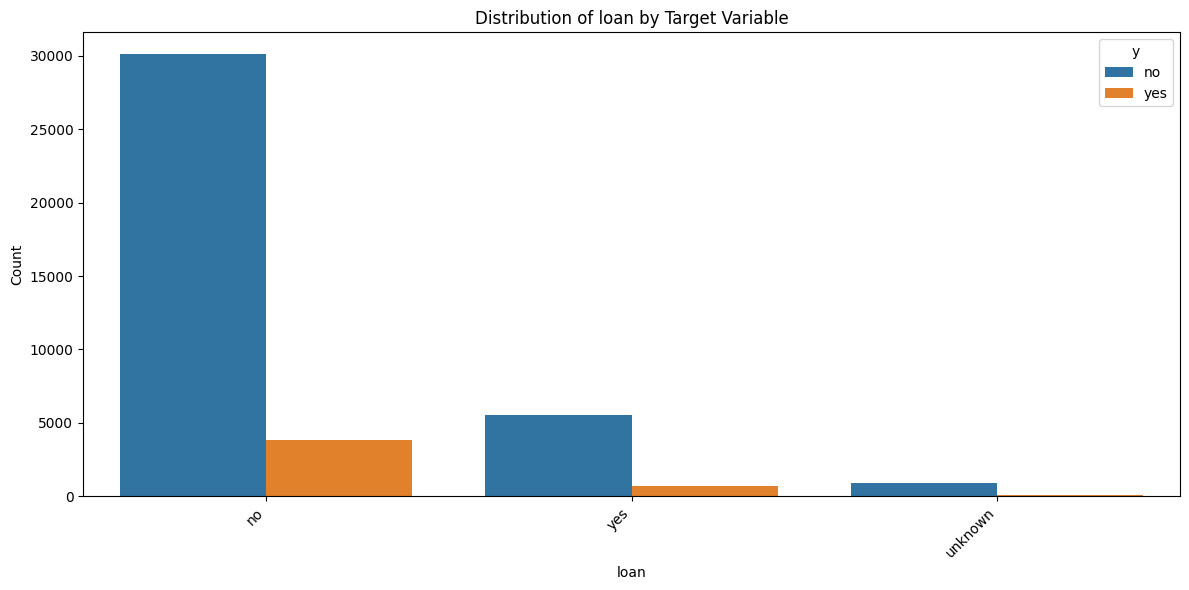

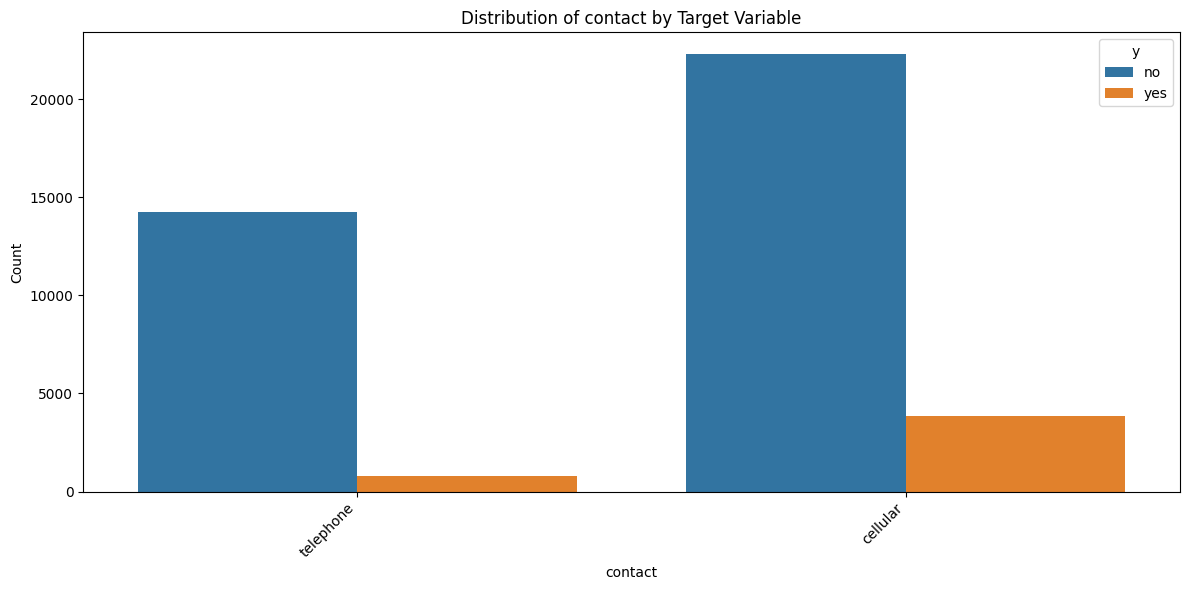

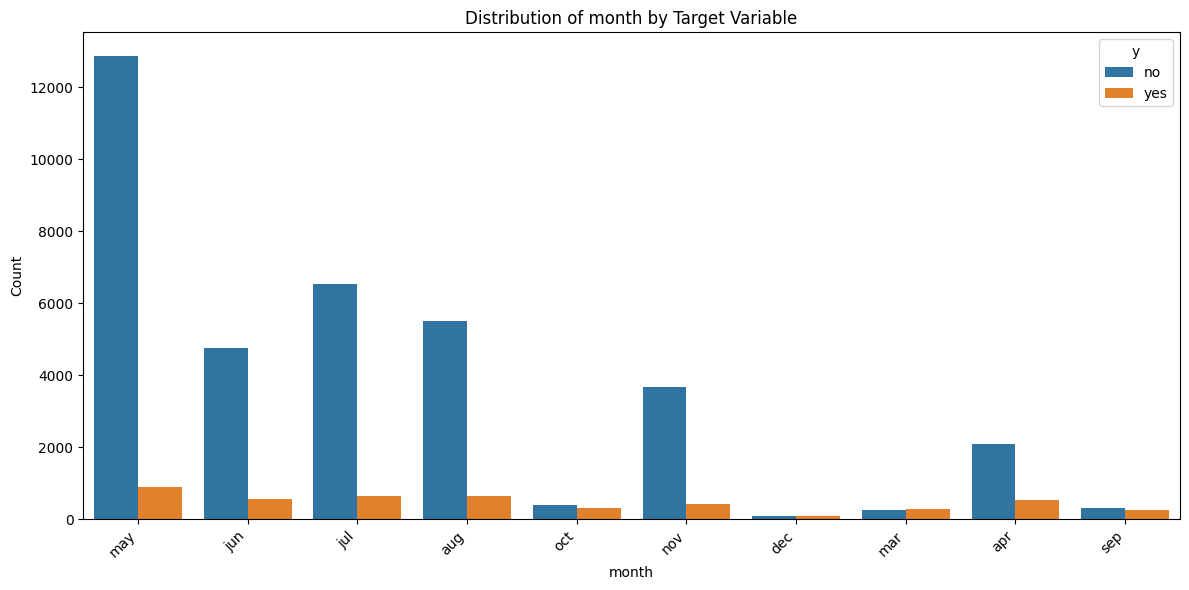

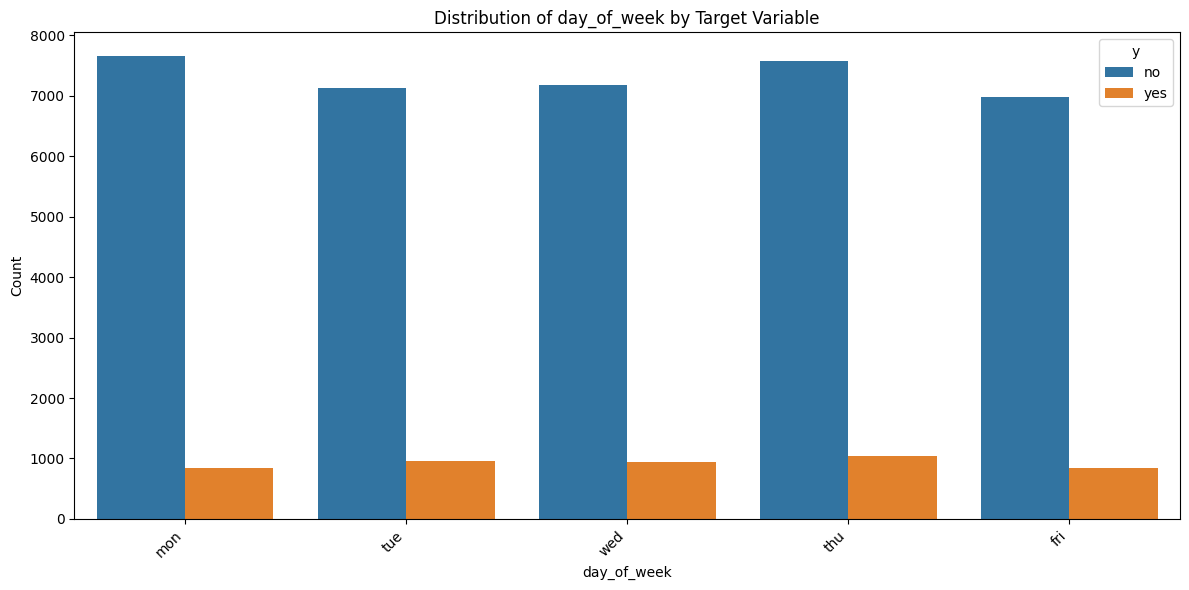

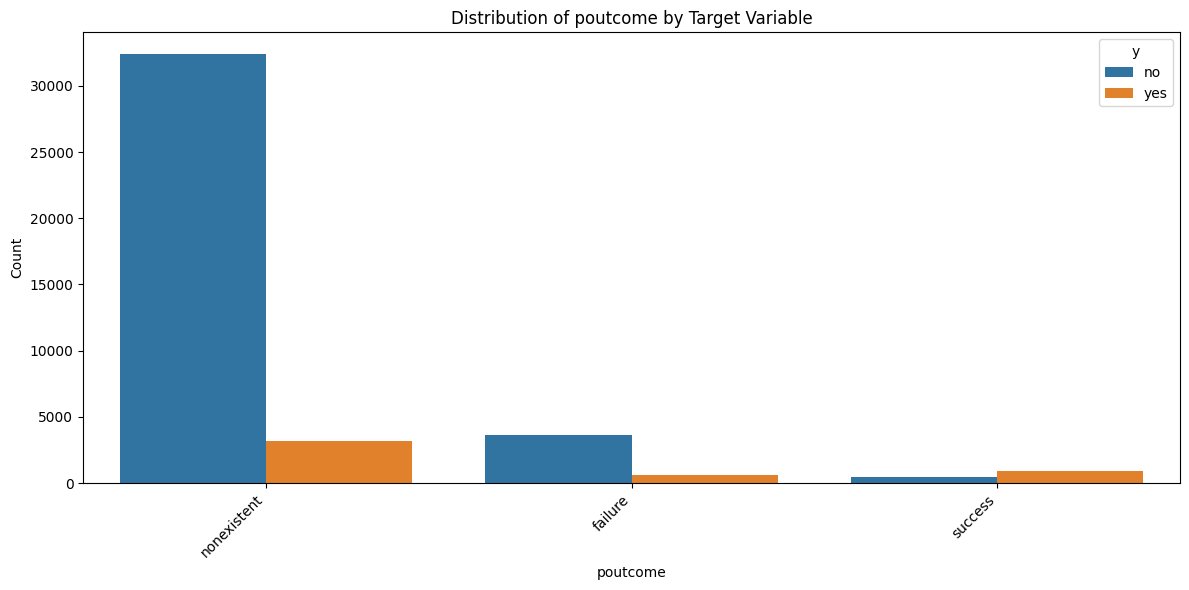

In [ ]:
# Visualize categorical features
# Create count plots or bar plots for each categorical feature, showing the distribution of the target variable 'y' within each category.
# Iterate through categorical columns and create count plots showing the distribution of the target variable 'y' within each category.
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## <font color="red">Data Analysis Key Findings

* <font color="blue">Histograms were generated for numerical features (age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) showing their distribution colored by the target variable 'y'.<br>
* <font color="blue">Count plots were generated for categorical features (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome) showing the distribution of the target variable 'y' within each category.<br>


<font color="blue">Analyzing the plots, several features appear to be key predictors for whether a client will subscribe to a term deposit:

<font color="green">**duration:** <font color="blue">This feature shows a significant difference in distribution between 'yes' and 'no' subscribers. Clients who subscribed generally have longer contact durations.

<font color="green">**poutcome:** <font color="blue">Clients with a 'success' outcome from the previous campaign are much more likely to subscribe in the current campaign.
euribor3m and nr.employed: These economic indicators show noticeable differences in distribution between the two target classes, suggesting their influence on subscription.

<font color="green">**contact:** <font color="blue">Clients contacted by 'cellular' are more likely to subscribe than those contacted by 'telephone'.

<font color="green">**month:** <font color="blue">Certain months, like March, September, October, and December, show a higher proportion of subscriptions.

<font color="blue">These features exhibit clear variations in distribution based on the target variable 'y', making them potentially strong predictors.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## <font color="blue">The business task is to predict whether a client will subscribe to a term deposit. This is the output/target variable 'y' in the dataset.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

## <font color="blue"> To start with, we need to deal with the outliers.<br> Looking at the above data, we will do the following:

In [ ]:
# Drop the rows that has "unknown" feature input
df2 = df.copy()
for col in df.select_dtypes(include='object').columns:
    df2 = df2[df2[col] != 'unknown']

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing 'unknown' values: {df2.shape}")

Original DataFrame shape: (41188, 21)
DataFrame shape after removing 'unknown' values: (30488, 21)


In [ ]:
# Remove rows that has age>75, duration>1500, campain>10, previous>=3, education=illiterate and default=yes
df3 = df2[(df2['age'] <= 75) & (df2['duration'] <= 1500) & (df2['campaign'] <= 10) & (df2['previous'] < 3) & (df2['education'] != 'illiterate') & (df2['default'] != 'yes')]
print(f"DataFrame shape after removing outliers: {df3.shape}")

DataFrame shape after removing outliers: (29287, 21)


In [ ]:
# Select categorical columns excluding the target variable 'y'
categorical_cols = df3.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)

# Convert boolean columns to int
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Encode the target variable 'y'
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


## <font color="blue"> Now, lets identify what features are highly correlated with target variable Y.<br>

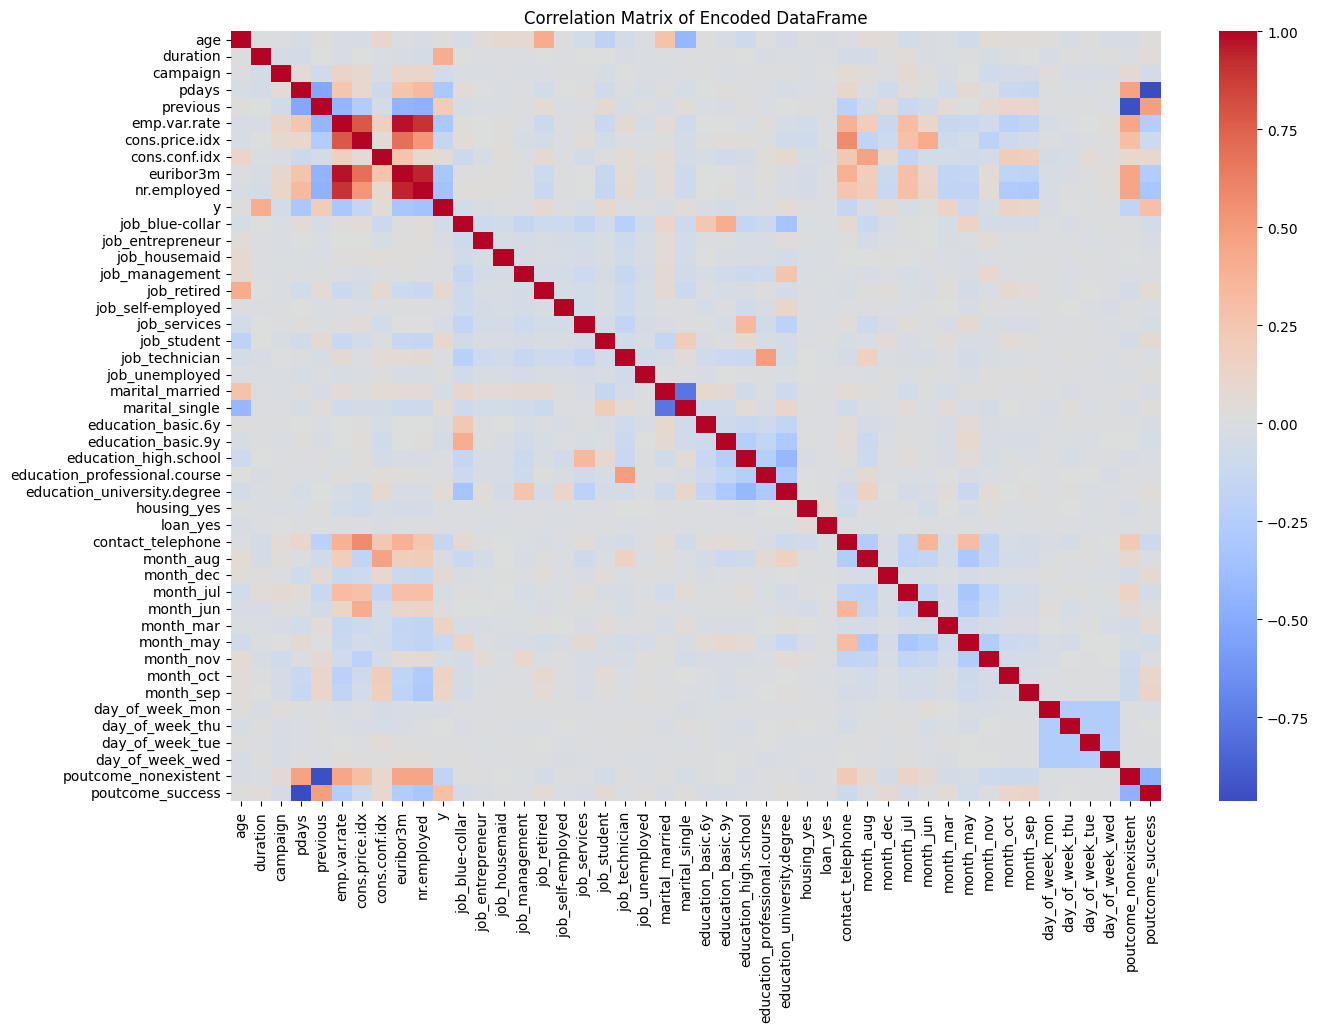

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Encoded DataFrame')
plt.show()

In [ ]:
# Calculate the correlation of each feature with the target variable 'y'
correlation_with_y = df_encoded.corr()['y'].sort_values(ascending=False)

# Identify features to remove (correlation between -0.1 and 0.1), excluding 'y' itself
features_to_remove = correlation_with_y[(correlation_with_y > -0.1) & (correlation_with_y < 0.1)].index.tolist()
if 'y' in features_to_remove:
    features_to_remove.remove('y')

# Drop the identified features from df_encoded
df_reduced = df_encoded.drop(columns=features_to_remove)

print(f"Original number of features: {df_encoded.shape[1]}")
print(f"Number of features after removing low-correlation features: {df_reduced.shape[1]}")
display(df_reduced.head())

Original number of features: 46
Number of features after removing low-correlation features: 15


,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,261,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
2,226,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
3,151,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
4,307,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
6,139,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# Define features (X) and target (y)
# X = df_encoded.drop('y', axis=1)
# y = df_encoded['y']
X = df_reduced.drop('y', axis=1)
y = df_reduced['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (23429, 14) (23429,)
Testing set shape (X_test, y_test): (5858, 14) (5858,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# Calculate the baseline accuracy
baseline_accuracy = y_train.value_counts(normalize=True).max()

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8800


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## <font color="blue">Logitic Regression

In [ ]:
start_time = time.time()
# Instantiate the Logistic Regression model with default settings
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)
train_time_lr = time.time() - start_time

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Calculate the accuracy of the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Model Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Model Accuracy: 0.9073


### Problem 9: Score the Model

What is the accuracy of your model?

## <font color="blue">KNN, Decision Tree, & SVM Models

In [ ]:
# Initialize a dictionary to store results
results = {}

# --- KNN Model ---
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
results['KNN'] = {'Train Time': train_time_knn, 'Train Accuracy': knn.score(X_train, y_train), 'Test Accuracy': accuracy_knn}

# --- Decision Tree Model ---
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
train_time_dt = time.time() - start_time
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
results['Decision Tree'] = {'Train Time': train_time_dt, 'Train Accuracy': dt.score(X_train, y_train), 'Test Accuracy': accuracy_dt}

# --- SVM Model ---
start_time = time.time()
# Using a smaller subset for SVM due to potential long training time
svm = SVC()
svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
results['SVM'] = {'Train Time': train_time_svm, 'Train Accuracy': svm.score(X_train, y_train), 'Test Accuracy': accuracy_svm}
# Note: SVM with default kernel can be very slow on this dataset size.
# For demonstration, we will skip SVM or suggest using a linear kernel or a subset of data if needed.
# print("SVM model fitting can be very time-consuming on this dataset. Skipping for now.")
# results['SVM'] = {'Train Time': 'Skipped', 'Train Accuracy': 'Skipped', 'Test Accuracy': 'Skipped'}

# --- SVM Model with Linear Kernel ---
start_time = time.time()
# Using a linear kernel for potentially faster training on this dataset
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
train_time_svm_linear = time.time() - start_time
y_pred_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
results['SVM (Linear Kernel)'] = {'Train Time': train_time_svm_linear, 'Train Accuracy': svm_linear.score(X_train, y_train), 'Test Accuracy': accuracy_svm_linear}

# Add Logistic Regression results (from previous steps)
results['Logistic Regression'] = {'Train Time': train_time_lr, 'Train Accuracy': log_reg.score(X_train, y_train), 'Test Accuracy': accuracy_log_reg}


# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display the results DataFrame
display(results_df)

,Train Time,Train Accuracy,Test Accuracy
KNN,0.057597,0.924495,0.901161
Decision Tree,0.077473,0.995220,0.889041
SVM,7.495684,0.888002,0.895698
SVM (Linear Kernel),28.959609,0.899782,0.906623
Logistic Regression,0.293036,0.901532,0.907306


## <font color="blue">Hyperparameters Tuning

In [ ]:
# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Instantiate GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)

Best parameters for KNN: {'n_neighbors': 11}
Best cross-validation accuracy for KNN: 0.897690980786566


In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.9071235966622802


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# Display the results DataFrame
display(results_df)

,Train Time,Train Accuracy,Test Accuracy
KNN,0.057597,0.924495,0.901161
Decision Tree,0.077473,0.995220,0.889041
SVM,7.495684,0.888002,0.895698
SVM (Linear Kernel),28.959609,0.899782,0.906623
Logistic Regression,0.293036,0.901532,0.907306


## <font color="blue">Summary

Looking at the performance comparison of models on unscaled data:

*   **Logistic Regression** has a good test accuracy (0.9073) and a moderate training time.
*   **KNN** has a slightly lower test accuracy (0.9012) compared to Logistic Regression and SVM (Linear Kernel) but a fast training time. It also shows a higher training accuracy (0.9245) than Logistic Regression and SVM, suggesting it might be slightly overfitting compared to them on the unscaled data.
*   **Decision Tree** has the lowest test accuracy (0.8890) among these models but the fastest training time. Its very high training accuracy (0.9952) indicates significant overfitting on the unscaled data.
*   **SVM (Linear Kernel)** has a test accuracy (0.9066) very close to Logistic Regression but a significantly longer training time.

In summary, on the unscaled data, Logistic Regression and SVM (Linear Kernel) achieved the highest test accuracies, while KNN and Decision Tree were faster to train. The Decision Tree showed clear signs of overfitting with default parameters.

## <font color="blue">Compare Precision, Recall, & F1-score

In [ ]:
# Initialize a dictionary to store additional metrics
metrics_results = {}

# --- Logistic Regression ---
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
metrics_results['Logistic Regression'] = {'Precision': precision_log_reg, 'Recall': recall_log_reg, 'F1-score': f1_log_reg}

# --- KNN Model ---
y_pred_knn = knn.predict(X_test)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
metrics_results['KNN'] = {'Precision': precision_knn, 'Recall': recall_knn, 'F1-score': f1_knn}

# --- Decision Tree Model ---
y_pred_dt = dt.predict(X_test)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
metrics_results['Decision Tree'] = {'Precision': precision_dt, 'Recall': recall_dt, 'F1-score': f1_dt}

# --- SVM (Linear Kernel) ---
y_pred_svm_linear = svm_linear.predict(X_test)
precision_svm_linear = precision_score(y_test, y_pred_svm_linear)
recall_svm_linear = recall_score(y_test, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)
metrics_results['SVM (Linear Kernel)'] = {'Precision': precision_svm_linear, 'Recall': recall_svm_linear, 'F1-score': f1_svm_linear}

# Create a DataFrame from the results
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Display the results DataFrame
display(metrics_df)

,Precision,Recall,F1-score
Logistic Regression,0.668213,0.418605,0.514745
KNN,0.595447,0.494186,0.540111
Decision Tree,0.518519,0.508721,0.513573
SVM (Linear Kernel),0.675810,0.393895,0.497704


## <font color="blue">Summary

Looking at the Precision, Recall, and F1-score for models on unscaled data:

*   **Logistic Regression** has the highest precision (0.6682) among these models, meaning when it predicts a positive case (subscription), it is most likely to be correct. Its recall (0.4186) and F1-score (0.5147) are moderate.
*   **KNN** has a lower precision (0.5954) than Logistic Regression but a higher recall (0.4942) and F1-score (0.5401). It offers a better balance between precision and recall compared to Logistic Regression on this unscaled data.
*   **Decision Tree** has the lowest precision (0.5185) but a relatively good recall (0.5087). Its F1-score (0.5136) is moderate, similar to Logistic Regression.
*   **SVM (Linear Kernel)** has a high precision (0.6758), slightly higher than Logistic Regression, but the lowest recall (0.3939) and F1-score (0.4977). This indicates that while it's good at not making false positive predictions, it misses many of the actual positive cases.

In summary, based on the F1-score, KNN performed best on the unscaled data, offering a good balance between precision and recall. Logistic Regression and SVM (Linear Kernel) had higher precision but lower recall. Decision Tree had a moderate F1-score with a balance between precision and recall. The best model choice depends on whether minimizing false positives (precision) or identifying most positive cases (recall) is more critical for the business objective.
In this exercise, identify false positive (precision) is crucial, Hence Logistic Regression seems to be the way forward.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## <font color="blue">In order to improve the model, lets try scaling the input data

In [ ]:
# Separate features (X) and target (y) if 'y' is in df_reduced
if 'y' in df_reduced.columns:
    X_reduced = df_reduced.drop('y', axis=1)
    y_reduced = df_reduced['y']
else:
    X_reduced = df_reduced
    y_reduced = None # Or handle as appropriate if y is not expected here

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X_reduced)

# Convert the scaled features back to a DataFrame for easier handling (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_reduced.columns, index=X_reduced.index)

# Display the first few rows of the scaled DataFrame
display(X_scaled_df.head())

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0.040351,0.194068,-0.393366,0.726735,0.823571,0.782928,0.394308,1.426176,-0.12336,1.440399,-0.142016,-0.122214,0.414215,-0.187241
2,-0.113918,0.194068,-0.393366,0.726735,0.823571,0.782928,0.394308,1.426176,-0.12336,1.440399,-0.142016,-0.122214,0.414215,-0.187241
3,-0.444494,0.194068,-0.393366,0.726735,0.823571,0.782928,0.394308,1.426176,-0.12336,1.440399,-0.142016,-0.122214,0.414215,-0.187241
4,0.243104,0.194068,-0.393366,0.726735,0.823571,0.782928,0.394308,1.426176,-0.12336,1.440399,-0.142016,-0.122214,0.414215,-0.187241
6,-0.497386,0.194068,-0.393366,0.726735,0.823571,0.782928,0.394308,1.426176,-0.12336,1.440399,-0.142016,-0.122214,0.414215,-0.187241


In [ ]:
# Create a new train/test split with X_scaled_df and y_reduced
from sklearn.model_selection import train_test_split

# Create a new train/test split using the scaled features and reduced target
X_train_scaled, X_test_scaled, y_train_reduced, y_test_reduced = train_test_split(X_scaled_df, y_reduced, test_size=0.2, random_state=42)

print("Scaled Training set shape (X_train_scaled, y_train_reduced):", X_train_scaled.shape, y_train_reduced.shape)
print("Scaled Testing set shape (X_test_scaled, y_test_reduced):", X_test_scaled.shape, y_test_reduced.shape)

Scaled Training set shape (X_train_scaled, y_train_reduced): (23429, 14) (23429,)
Scaled Testing set shape (X_test_scaled, y_test_reduced): (5858, 14) (5858,)


In [ ]:
# Train Logistic Regression, KNN, Decision Tree, and SVM on new scaled data
# Initialize a dictionary to store results for scaled data
scaled_results = {}
scaled_metrics_results = {}

# --- Logistic Regression Model (Scaled Data) ---
start_time = time.time()
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train_reduced)
train_time_log_reg_scaled = time.time() - start_time
y_pred_log_reg_scaled = log_reg_scaled.predict(X_test_scaled)
accuracy_log_reg_scaled = accuracy_score(y_test_reduced, y_pred_log_reg_scaled)
precision_log_reg_scaled = precision_score(y_test_reduced, y_pred_log_reg_scaled)
recall_log_reg_scaled = recall_score(y_test_reduced, y_pred_log_reg_scaled)
f1_log_reg_scaled = f1_score(y_test_reduced, y_pred_log_reg_scaled)
scaled_results['Logistic Regression (Scaled)'] = {'Train Time': train_time_log_reg_scaled, 'Train Accuracy': log_reg_scaled.score(X_train_scaled, y_train_reduced), 'Test Accuracy': accuracy_log_reg_scaled}
scaled_metrics_results['Logistic Regression (Scaled)'] = {'Precision': precision_log_reg_scaled, 'Recall': recall_log_reg_scaled, 'F1-score': f1_log_reg_scaled}


# --- KNN Model (Scaled Data) ---
start_time = time.time()
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train_reduced)
train_time_knn_scaled = time.time() - start_time
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
accuracy_knn_scaled = accuracy_score(y_test_reduced, y_pred_knn_scaled)
precision_knn_scaled = precision_score(y_test_reduced, y_pred_knn_scaled)
recall_knn_scaled = recall_score(y_test_reduced, y_pred_knn_scaled)
f1_knn_scaled = f1_score(y_test_reduced, y_pred_knn_scaled)
scaled_results['KNN (Scaled)'] = {'Train Time': train_time_knn_scaled, 'Train Accuracy': knn_scaled.score(X_train_scaled, y_train_reduced), 'Test Accuracy': accuracy_knn_scaled}
scaled_metrics_results['KNN (Scaled)'] = {'Precision': precision_knn_scaled, 'Recall': recall_knn_scaled, 'F1-score': f1_knn_scaled}


# --- Decision Tree Model (Scaled Data) ---
start_time = time.time()
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train_reduced)
train_time_dt_scaled = time.time() - start_time
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)
accuracy_dt_scaled = accuracy_score(y_test_reduced, y_pred_dt_scaled)
precision_dt_scaled = precision_score(y_test_reduced, y_pred_dt_scaled)
recall_dt_scaled = recall_score(y_test_reduced, y_pred_dt_scaled)
f1_dt_scaled = f1_score(y_test_reduced, y_pred_dt_scaled)
scaled_results['Decision Tree (Scaled)'] = {'Train Time': train_time_dt_scaled, 'Train Accuracy': dt_scaled.score(X_train_scaled, y_train_reduced), 'Test Accuracy': accuracy_dt_scaled}
scaled_metrics_results['Decision Tree (Scaled)'] = {'Precision': precision_dt_scaled, 'Recall': recall_dt_scaled, 'F1-score': f1_dt_scaled}


# --- SVM Model (Linear Kernel, Scaled Data) ---
start_time = time.time()
svm_linear_scaled = SVC(kernel='linear')
svm_linear_scaled.fit(X_train_scaled, y_train_reduced)
train_time_svm_linear_scaled = time.time() - start_time
y_pred_svm_linear_scaled = svm_linear_scaled.predict(X_test_scaled)
accuracy_svm_linear_scaled = accuracy_score(y_test_reduced, y_pred_svm_linear_scaled)
precision_svm_linear_scaled = precision_score(y_test_reduced, y_pred_svm_linear_scaled)
recall_svm_linear_scaled = recall_score(y_test_reduced, y_pred_svm_linear_scaled)
f1_svm_linear_scaled = f1_score(y_test_reduced, y_pred_svm_linear_scaled)
scaled_results['SVM (Linear Kernel, Scaled)'] = {'Train Time': train_time_svm_linear_scaled, 'Train Accuracy': svm_linear_scaled.score(X_train_scaled, y_train_reduced), 'Test Accuracy': accuracy_svm_linear_scaled}
scaled_metrics_results['SVM (Linear Kernel, Scaled)'] = {'Precision': precision_svm_linear_scaled, 'Recall': recall_svm_linear_scaled, 'F1-score': f1_svm_linear_scaled}


# Create DataFrames from the results
scaled_results_df = pd.DataFrame.from_dict(scaled_results, orient='index')
scaled_metrics_df = pd.DataFrame.from_dict(scaled_metrics_results, orient='index')

print("Model Performance Comparison (Scaled Data - Accuracy and Train Time):")
display(scaled_results_df)

print("\nModel Performance Comparison (Scaled Data - Precision, Recall, F1-score):")
display(scaled_metrics_df)

Model Performance Comparison (Scaled Data - Accuracy and Train Time):


,Train Time,Train Accuracy,Test Accuracy
Logistic Regression (Scaled),0.088591,0.902557,0.908330
KNN (Scaled),0.093776,0.928721,0.904063
Decision Tree (Scaled),0.075543,0.995220,0.888529
"SVM (Linear Kernel, Scaled)",9.011661,0.898673,0.905428



Model Performance Comparison (Scaled Data - Precision, Recall, F1-score):


,Precision,Recall,F1-score
Logistic Regression (Scaled),0.678487,0.417151,0.516652
KNN (Scaled),0.606061,0.523256,0.561622
Decision Tree (Scaled),0.525849,0.517442,0.521612
"SVM (Linear Kernel, Scaled)",0.685083,0.360465,0.472381


## <font color="blue">Summary of Scaled Model Performance

Here's a summary of the performance of the models trained on the scaled dat:

### Accuracy and Train Time

*   **Logistic Regression (Scaled)**: Highest test accuracy (0.9083) with relatively low training time.
*   **KNN (Scaled)**: High test accuracy (0.9041) and relatively low training time. Shows higher training accuracy (0.9287), suggesting potential slight overfitting compared to Logistic Regression and SVM.
*   **Decision Tree (Scaled)**: Lowest test accuracy (0.8885) among scaled models, but the lowest training time. Very high training accuracy (0.9952) indicates significant overfitting.
*   **SVM (Linear Kernel, Scaled)**: Good test accuracy (0.9054) but the longest training time.

### Precision, Recall, and F1-score

*   **Logistic Regression (Scaled)**: Highest precision (0.6785), moderate recall (0.4172) and F1-score (0.5167). Good at minimizing false positives.
*   **KNN (Scaled)**: Lower precision (0.6061) than Logistic Regression and SVM, but higher recall (0.5233) and the highest F1-score (0.5616). Offers a good balance between precision and recall.
*   **Decision Tree (Scaled)**: Lowest precision (0.5258), relatively good recall (0.5174), and moderate F1-score (0.5216).
*   **SVM (Linear Kernel, Scaled)**: Highest precision (0.6851), but the lowest recall (0.3605) and F1-score (0.4724). Excellent at minimizing false positives but misses many true positives.

### Overall Summary

*   **Based on Accuracy**: Logistic Regression and SVM (Linear Kernel) performed best.
*   **Based on F1-score**: KNN (Scaled) performed the best, showing a good balance between precision and recall.
*   **For Maximizing Precision**: SVM (Linear Kernel, Scaled) or Logistic Regression (Scaled) are preferred.
*   **For Maximizing Recall**: KNN (Scaled) or Decision Tree (Scaled) are preferred.

The most suitable model depends on the specific business objective and the relative importance of minimizing false positives versus identifying all positive cases. Therefore, Logistic Regression seems to be the best model for this example.

##### Questions